In [1]:
import urllib.request
from PIL import Image
import numpy as np

In [2]:
urllib.request.urlretrieve("https://pixy.org/src/154/thumbs350/1547777.jpg", "jeans.jpg")

img = Image.open('jeans.jpg')
img_grey = img.convert('L')
img_grey_small = img_grey.resize((28,28))
img_grey_small.save('jeans_grey_small.jpg')

In [3]:
np_image = np.array(img_grey_small)
#print(np_image)

In [4]:
import tensorflow as tf
model = tf.keras.models.load_model('saved_model/')
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 128)               100480    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_41 (Dense)            (None, 256)               33024     
                                                                 
 dense_42 (Dense)            (None, 512)               131584    
                                                                 
 dense_43 (Dense)            (None, 10)                5130      
                                                                 
Total params: 270,218
Trainable params: 270,218
Non-t

In [5]:
np_image = np_image / 255.0

In [6]:
#print(np_image)

In [7]:
prediction = model.predict(np.expand_dims(np_image, 0))

In [8]:
print(prediction)

[[-15.462422  -17.782455  -18.742992  -19.89375   -24.046255    1.355015
  -20.20756    -6.599114  -11.11962     4.6713333]]


In [9]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat',
              'Sandals', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']

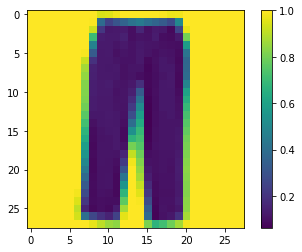

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(np_image)
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(_, _) , (test_images, test_labels) = fashion_mnist.load_data()

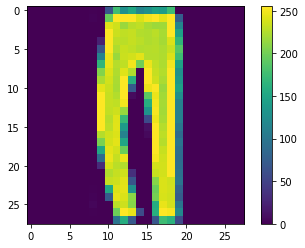

In [12]:
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
np_image = 1 - np_image #invert colors

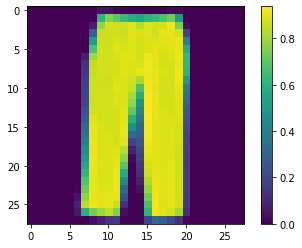

In [14]:
plt.figure()
plt.imshow(np_image)
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
prediction = model.predict(np.expand_dims(np_image, 0))

In [16]:
print(prediction)

[[ -1.2477201   8.556555   -5.993084   -2.8547535  -2.9686894 -26.219425
   -1.3814613 -23.471485   -7.995389  -18.62457  ]]


In [17]:
test_predictions = model.predict(test_images)

In [19]:
print(test_predictions.shape)

(10000, 10)


In [20]:
np.array(np.unique(test_labels, return_counts=True)).T

array([[   0, 1000],
       [   1, 1000],
       [   2, 1000],
       [   3, 1000],
       [   4, 1000],
       [   5, 1000],
       [   6, 1000],
       [   7, 1000],
       [   8, 1000],
       [   9, 1000]])

In [21]:
print(test_labels)

[9 2 1 ... 8 1 5]


In [22]:
result = np.argmax(test_predictions, axis = 1)

In [23]:
print(result)

[9 2 1 ... 8 1 5]


In [27]:
wrong_predictions = np.zeros([3,1])

for i, val in enumerate(result):
    if test_labels[i] != val:
        wrong_predictions = np.append(wrong_predictions, [[i], [test_labels[i]], [val]], axis=1)

In [28]:
np.array(np.unique(wrong_predictions[1], return_counts=True)).T

array([[  0., 134.],
       [  1.,  21.],
       [  2., 335.],
       [  3., 157.],
       [  4.,  85.],
       [  5.,  87.],
       [  6., 433.],
       [  7., 109.],
       [  8.,  34.],
       [  9.,  13.]])

In [29]:
np.array(np.unique(wrong_predictions[2], return_counts=True)).T

array([[  0., 238.],
       [  1.,  56.],
       [  2., 124.],
       [  3.,  79.],
       [  4., 475.],
       [  5.,  11.],
       [  6., 178.],
       [  7.,  45.],
       [  8.,  38.],
       [  9., 164.]])